## Vizzy Sample Notebook (Vizzy_Doc)

The data needed for this tutorial can be downloaded at https://www.kaggle.com/datasets/thedevastator/the-ultimate-netflix-tv-shows-and-movies-dataset?resource=download

Our first step is to get our data ready to be turned into a Vizzy object. Vizzy objects accept data as a Pandas DataFrame, so we will need to read in our CSV's as DataFrames

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/Best Shows Netflix.csv')

Let's take a look at our data

In [2]:
df.head()

,index,TITLE,RELEASE_YEAR,SCORE,NUMBER_OF_VOTES,DURATION,NUMBER_OF_SEASONS,MAIN_GENRE,MAIN_PRODUCTION
0,0,Breaking Bad,2008,9.5,1727694,48,5,drama,US
1,1,Avatar: The Last Airbender,2005,9.3,297336,24,3,scifi,US
2,2,Our Planet,2019,9.3,41386,50,1,documentary,GB
3,3,Kota Factory,2019,9.3,66985,42,2,drama,IN
4,4,The Last Dance,2020,9.1,108321,50,1,documentary,US


We need to add a "split" column for a later function

In [3]:
split = np.where(np.random.rand(df.shape[0]) < 0.8, "train", "test")

In [4]:
df['split'] = split

Import the vizzy package library

In [5]:
from vizzy import vizzy

/home/eanthony/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/eanthony/anaconda3/lib/python3.9/site-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-02-17 10:23:43.175622: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-17 10:23:43.354219: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment varia

The vizzy package has three types of objec|ts: vizzy_doc, vizzy_sentence, and vizzy_token

Vizzy_doc takes in two required inputs: a Pandas DataFrame and column as a string value. You may also include up to five columns when you initialize your viz object.

For our demo, we will look at the Title, Release Year, and Main Genre columns

In [6]:
viz = vizzy.vizzy_doc(df, 'TITLE', 'RELEASE_YEAR', 'MAIN_GENRE')

Vizzy Doc objects have two functions- print_doc_stats, which will print a report for us which shows the breakdown of our data based on the columns we selected, and show_doc_stats, which will represent the same data in graph form.

In [7]:
viz.print_doc_stats()

Here is your data summary:
Total number of documents: 245
Total number of TITLE: 246
Total number of RELEASE_YEAR: 30
Total number of MAIN_GENRE: 12


Vizzy Doc objects take two optional inputs- "date_column" as a string value and "date_format" as Strptime format.

In [8]:
viz = vizzy.vizzy_doc(df, 'DURATION', 'MAIN_GENRE', 'SCORE', 'NUMBER_OF_SEASONS', date_column = 'RELEASE_YEAR', date_format = '%Y', split='split')

In [9]:
viz.print_doc_stats()

Here is your data summary:
Total number of documents: 245
Total number of DURATION: 50
Total number of MAIN_GENRE: 12
Total number of SCORE: 19
Total number of NUMBER_OF_SEASONS: 16


If we want to see our data in graph form, we can call the show_doc_stats function

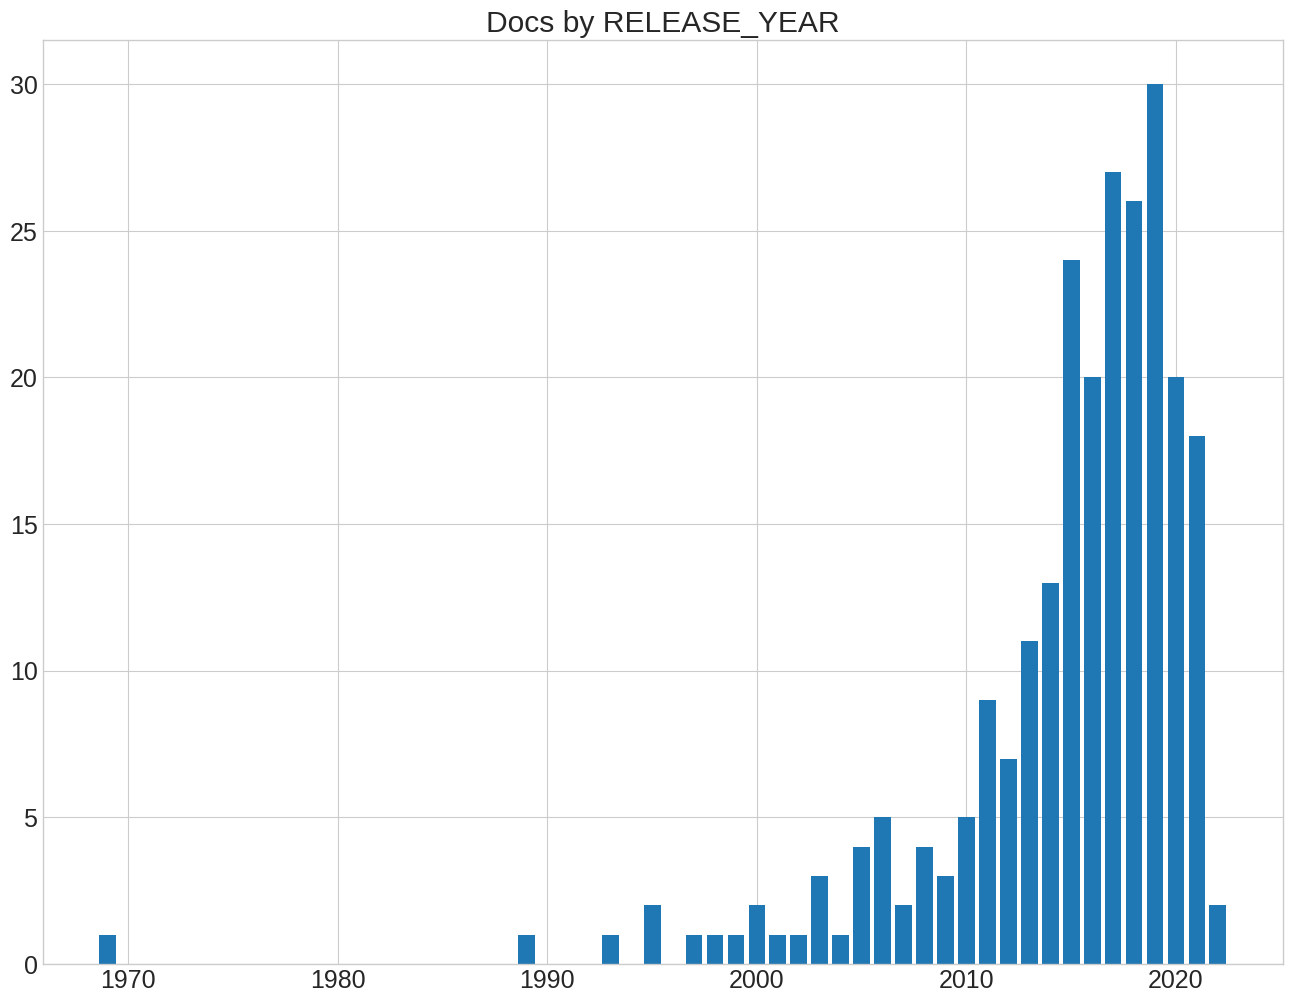

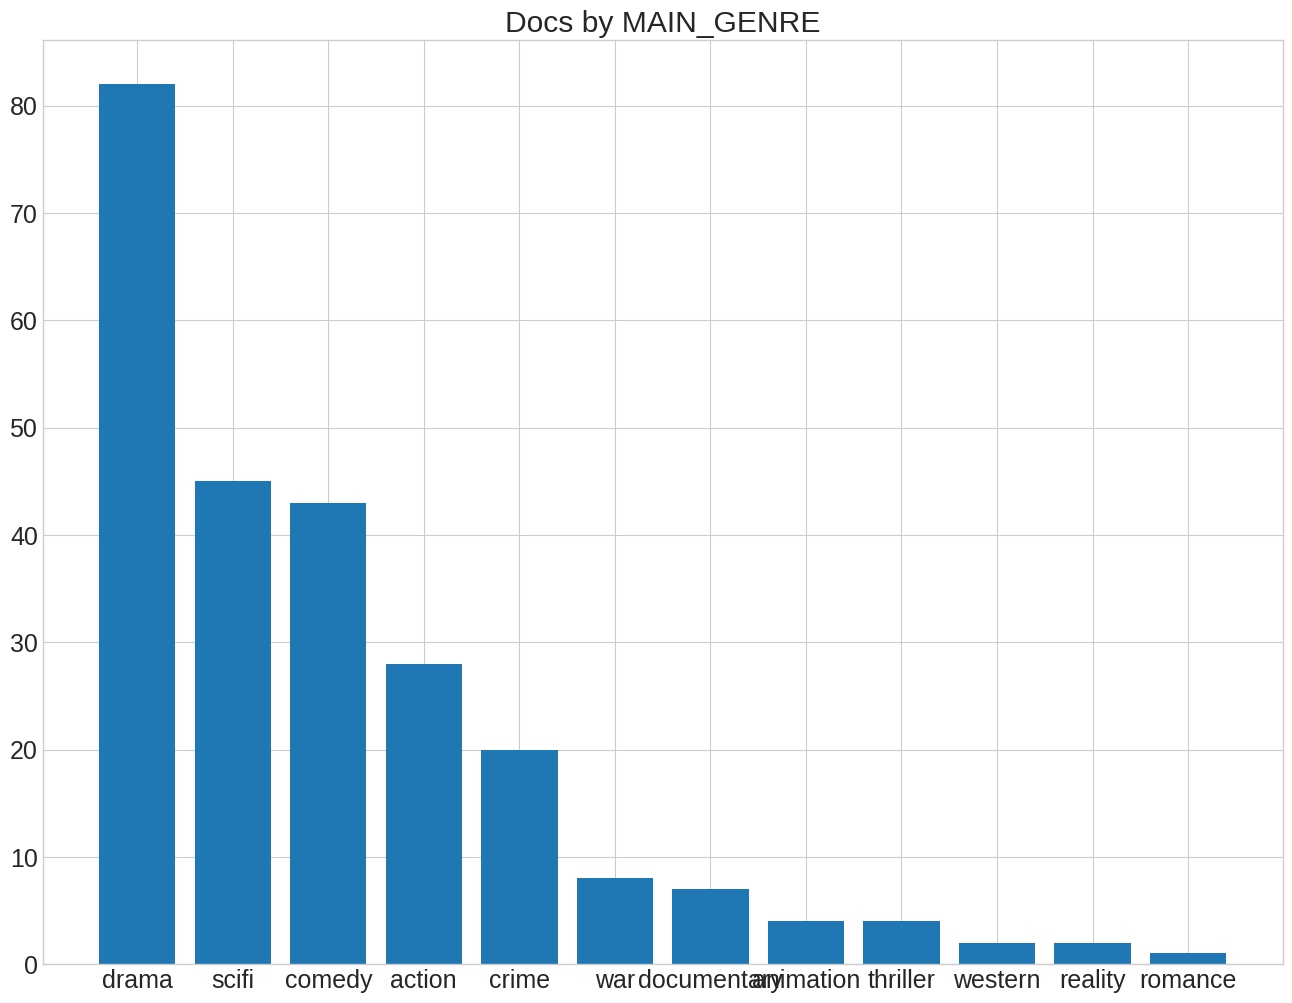

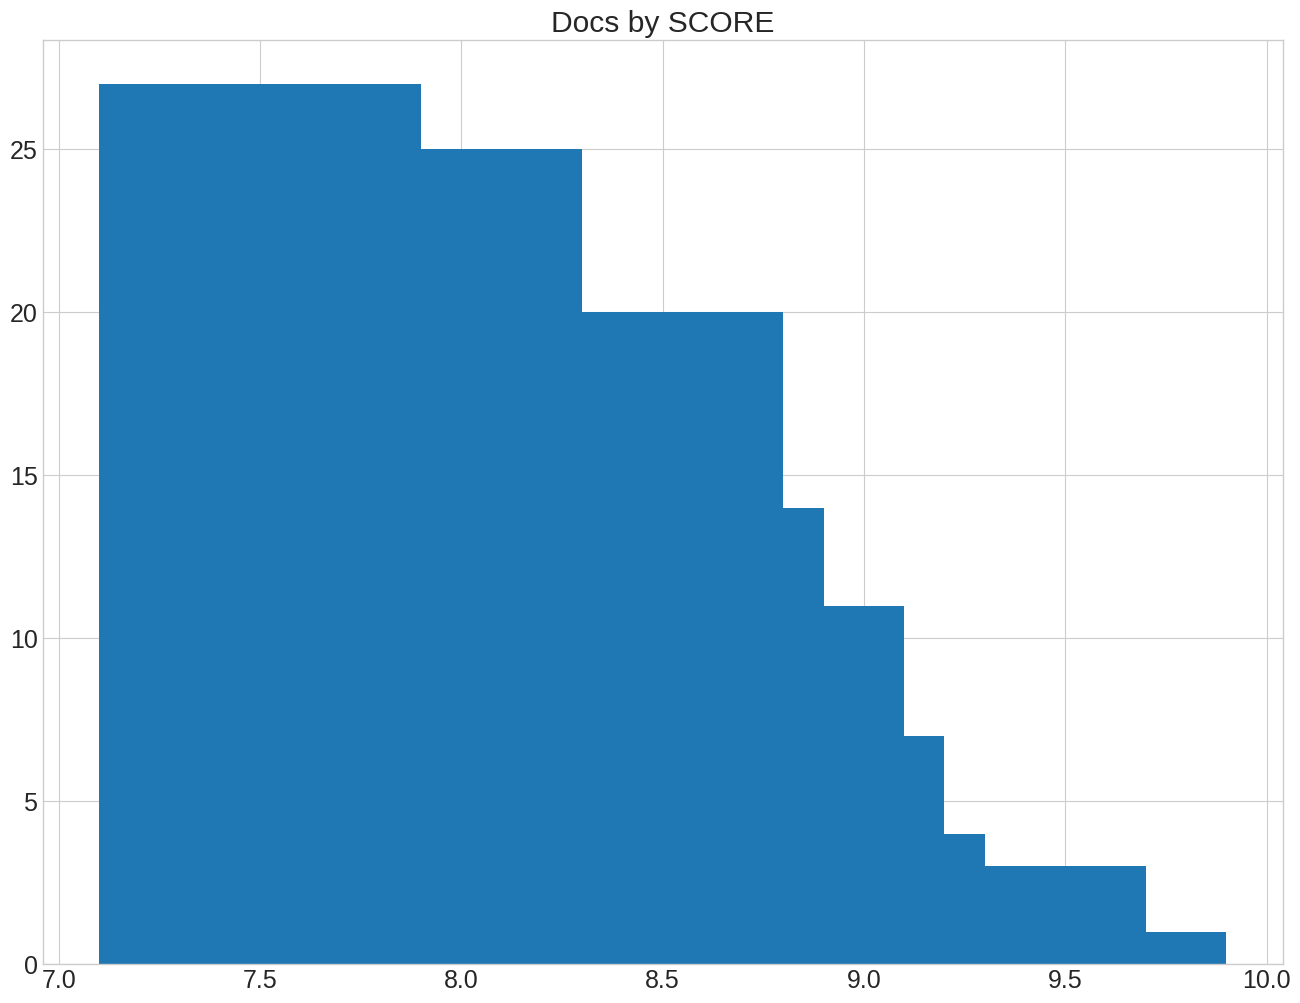

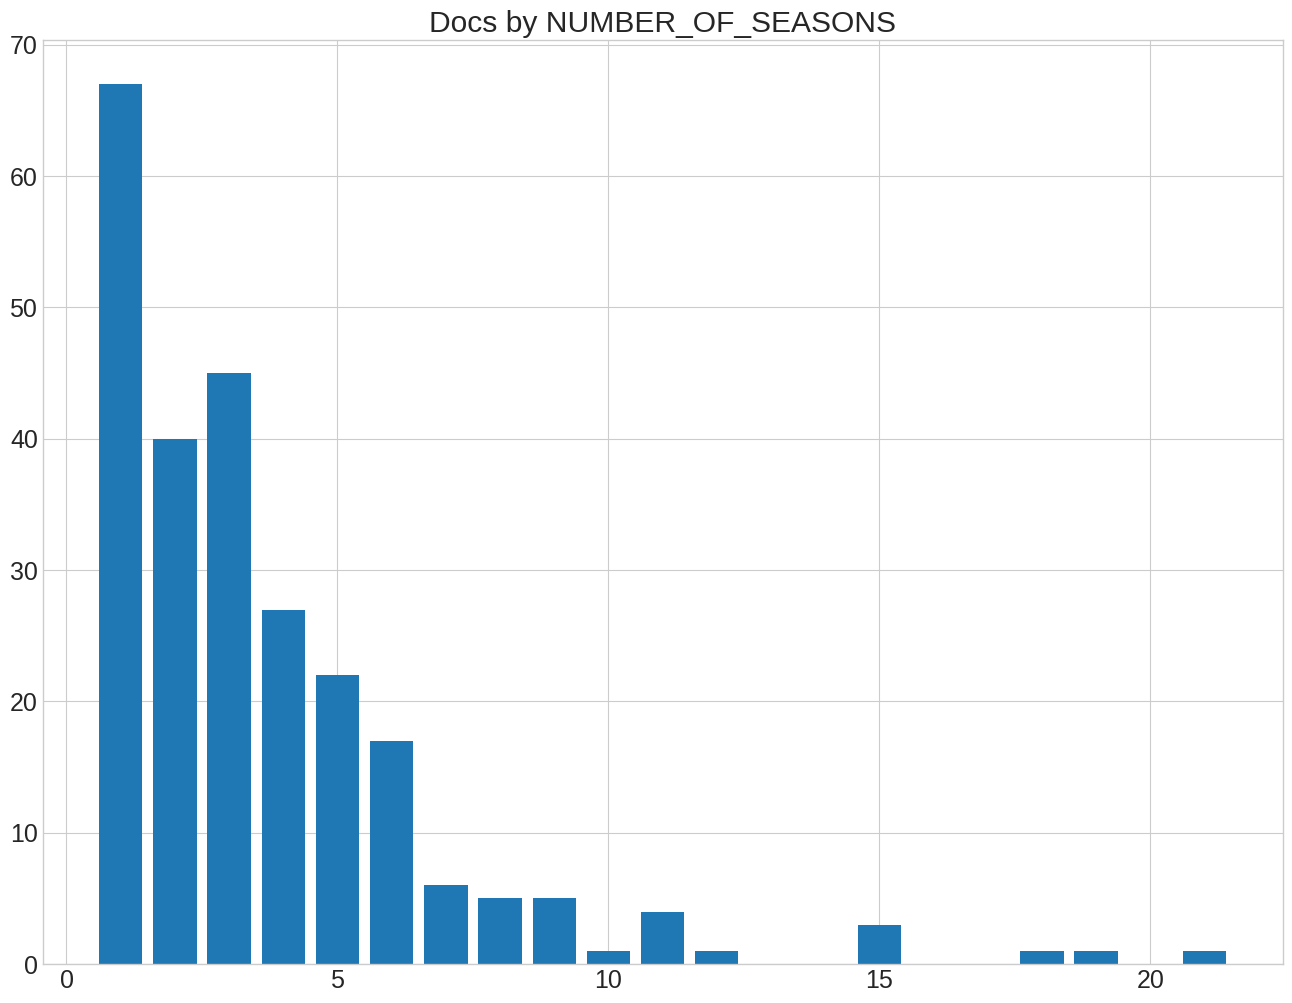

In [10]:
viz.show_doc_stats()

If we have a split in our data, we can define it when we create our vizzy doc object. We can see our data broken up if we run the show_split_doc_stats function. This function takes the values in your "split" column as inputs

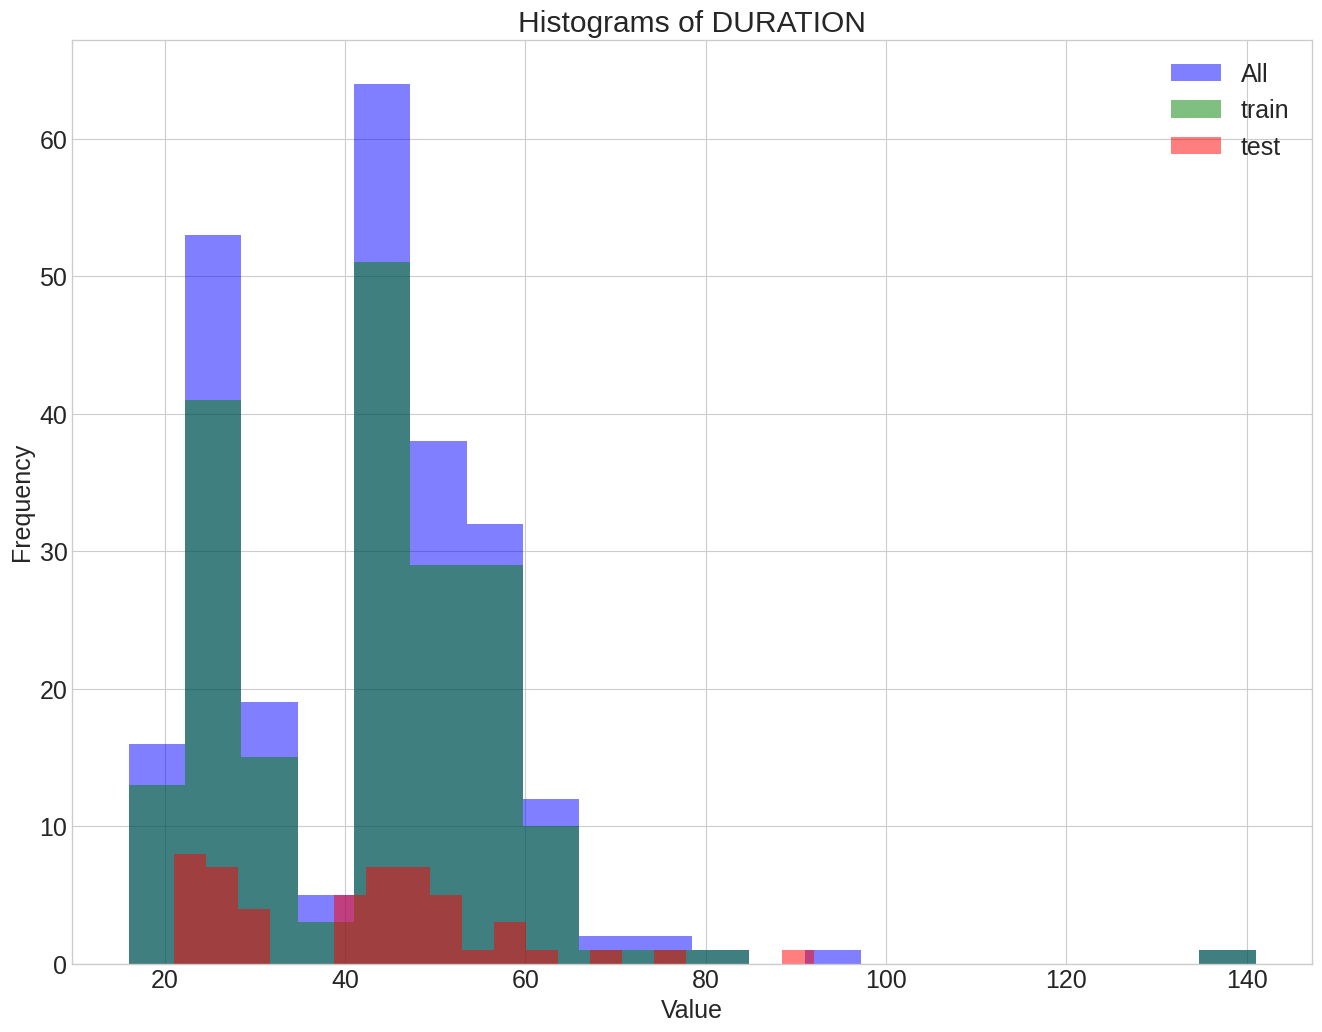

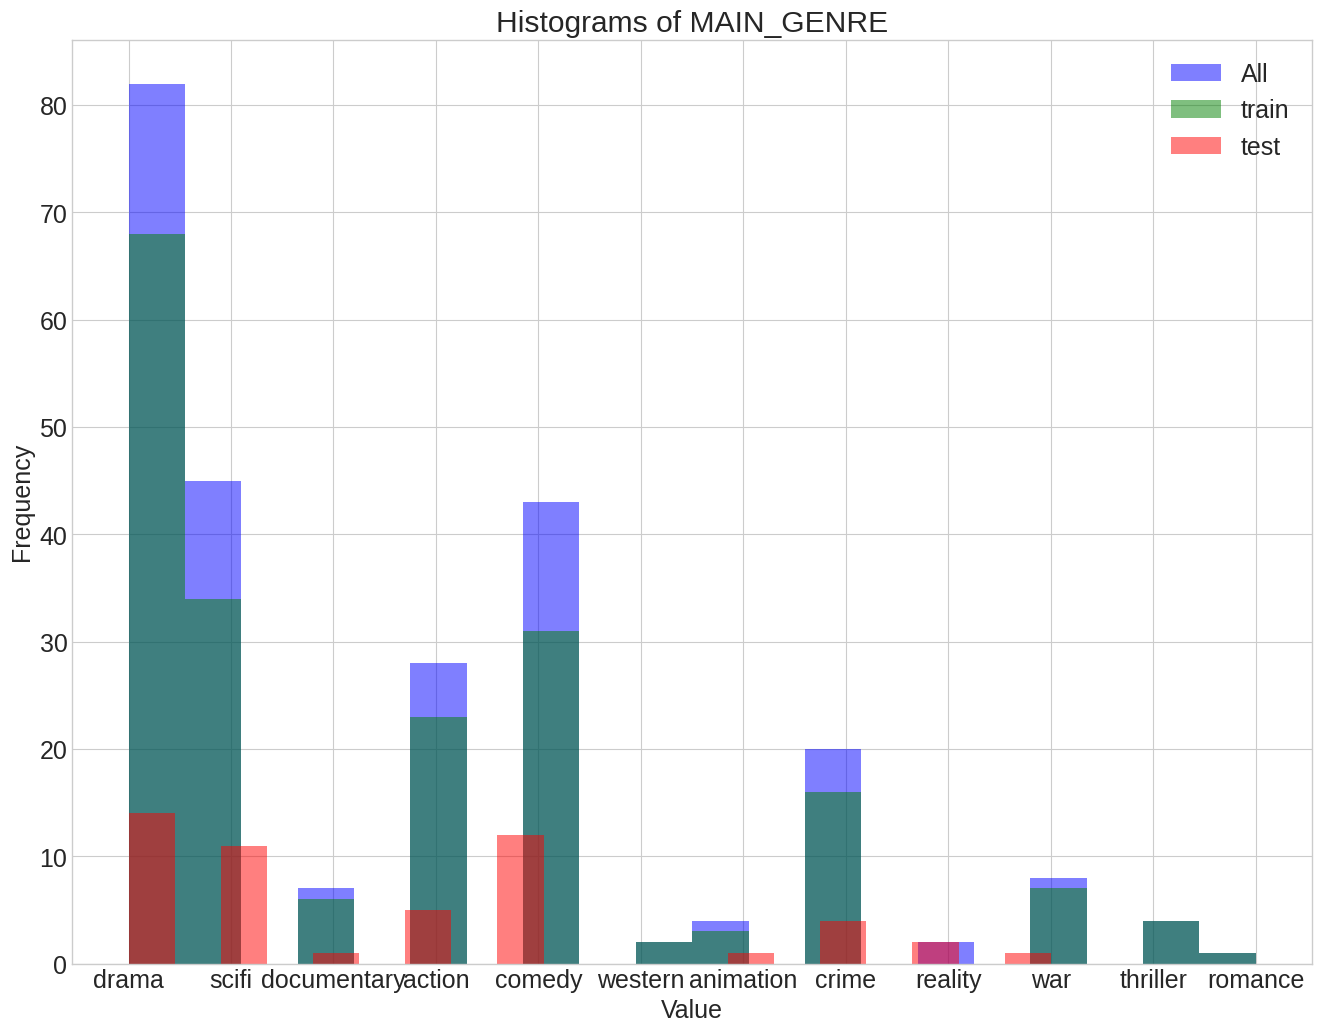

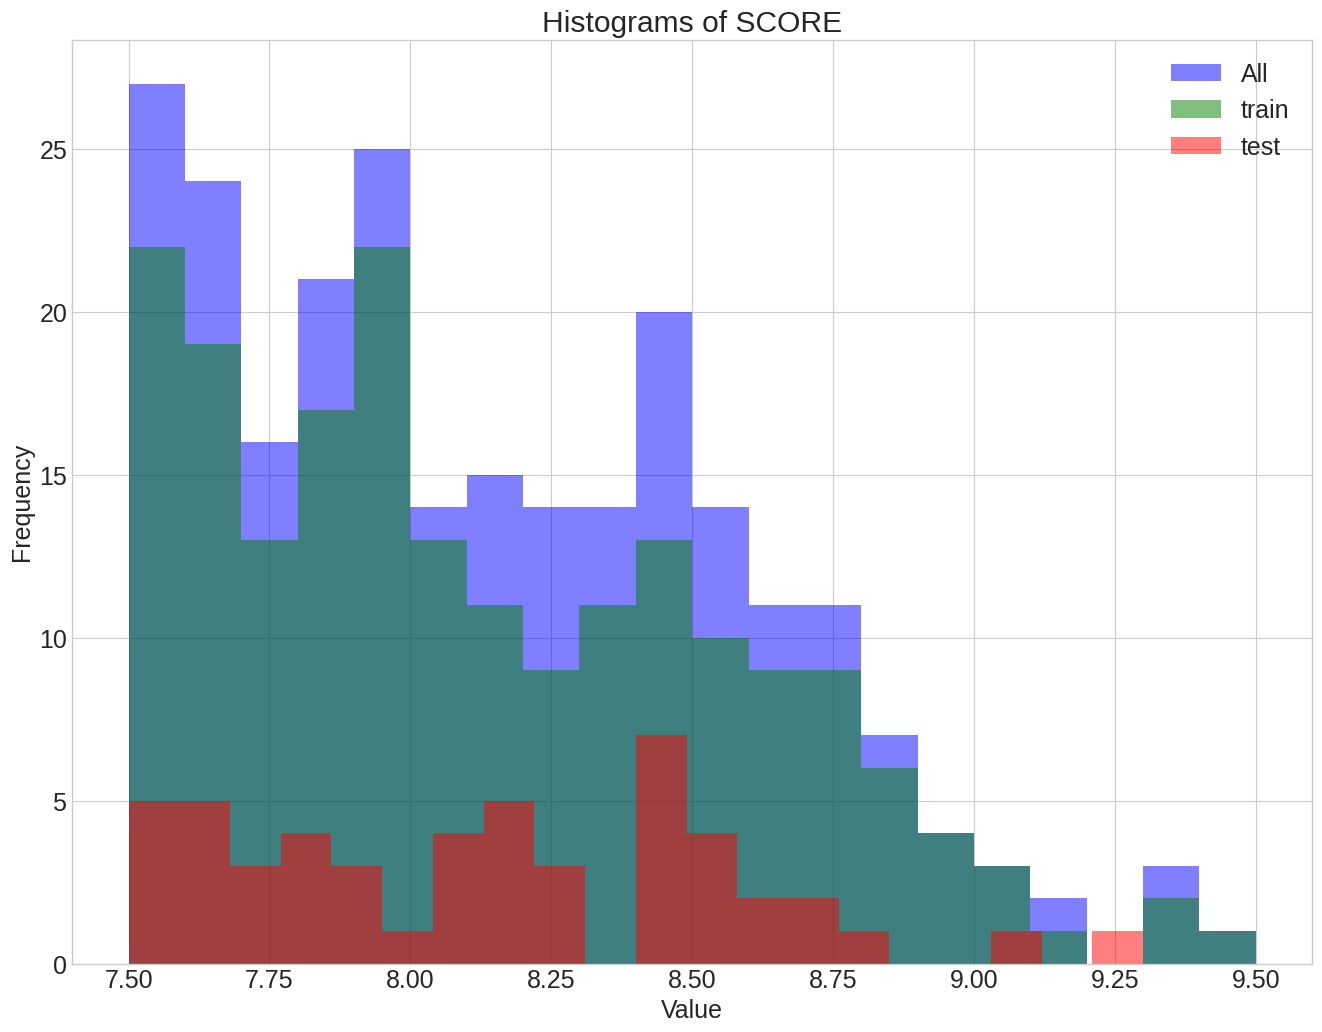

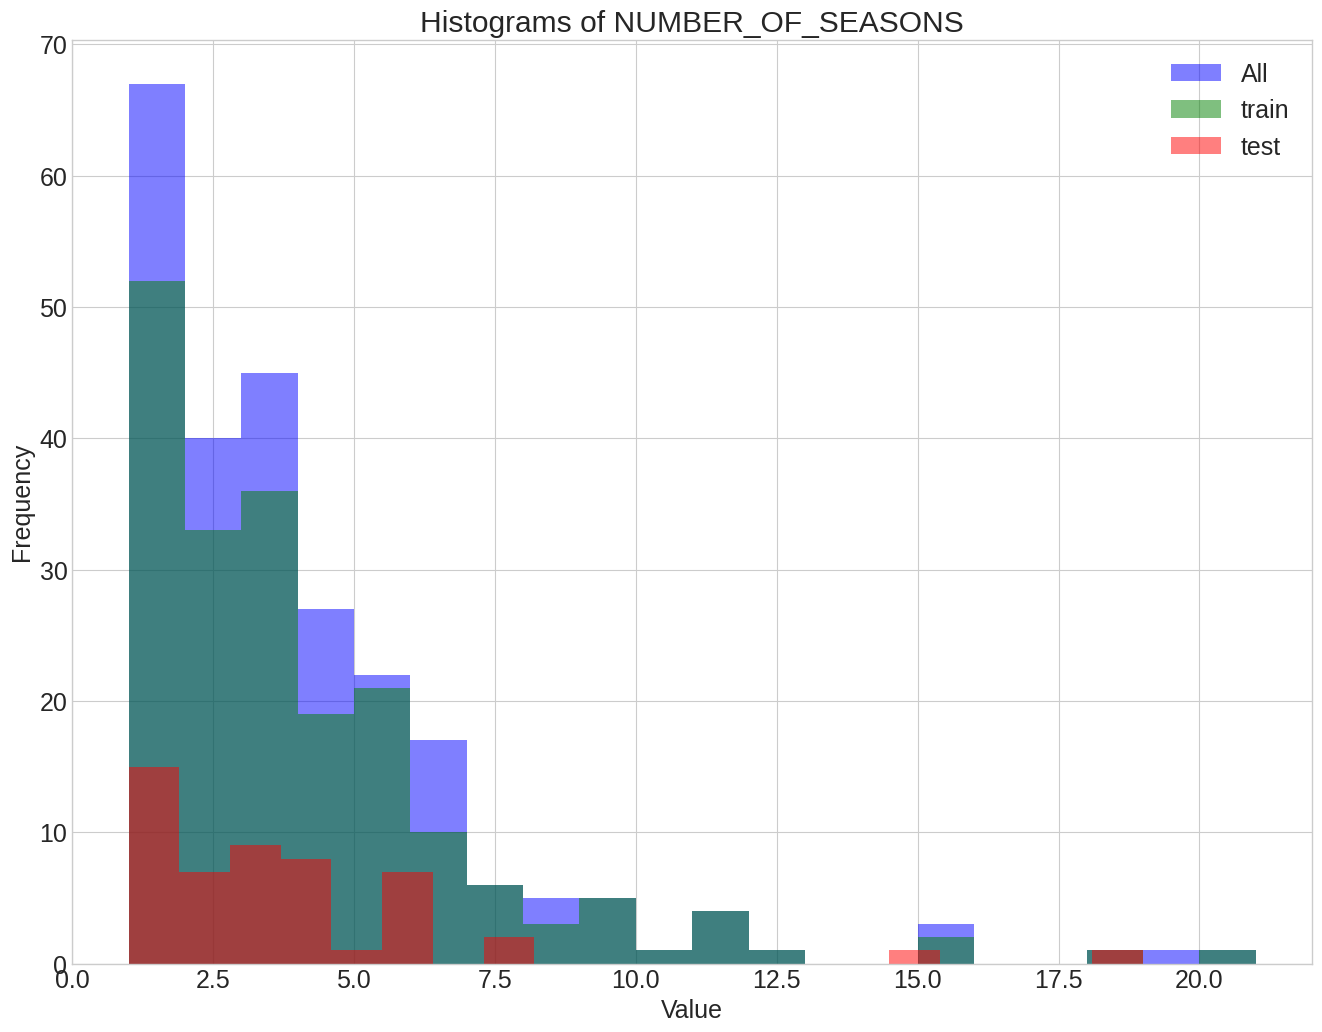

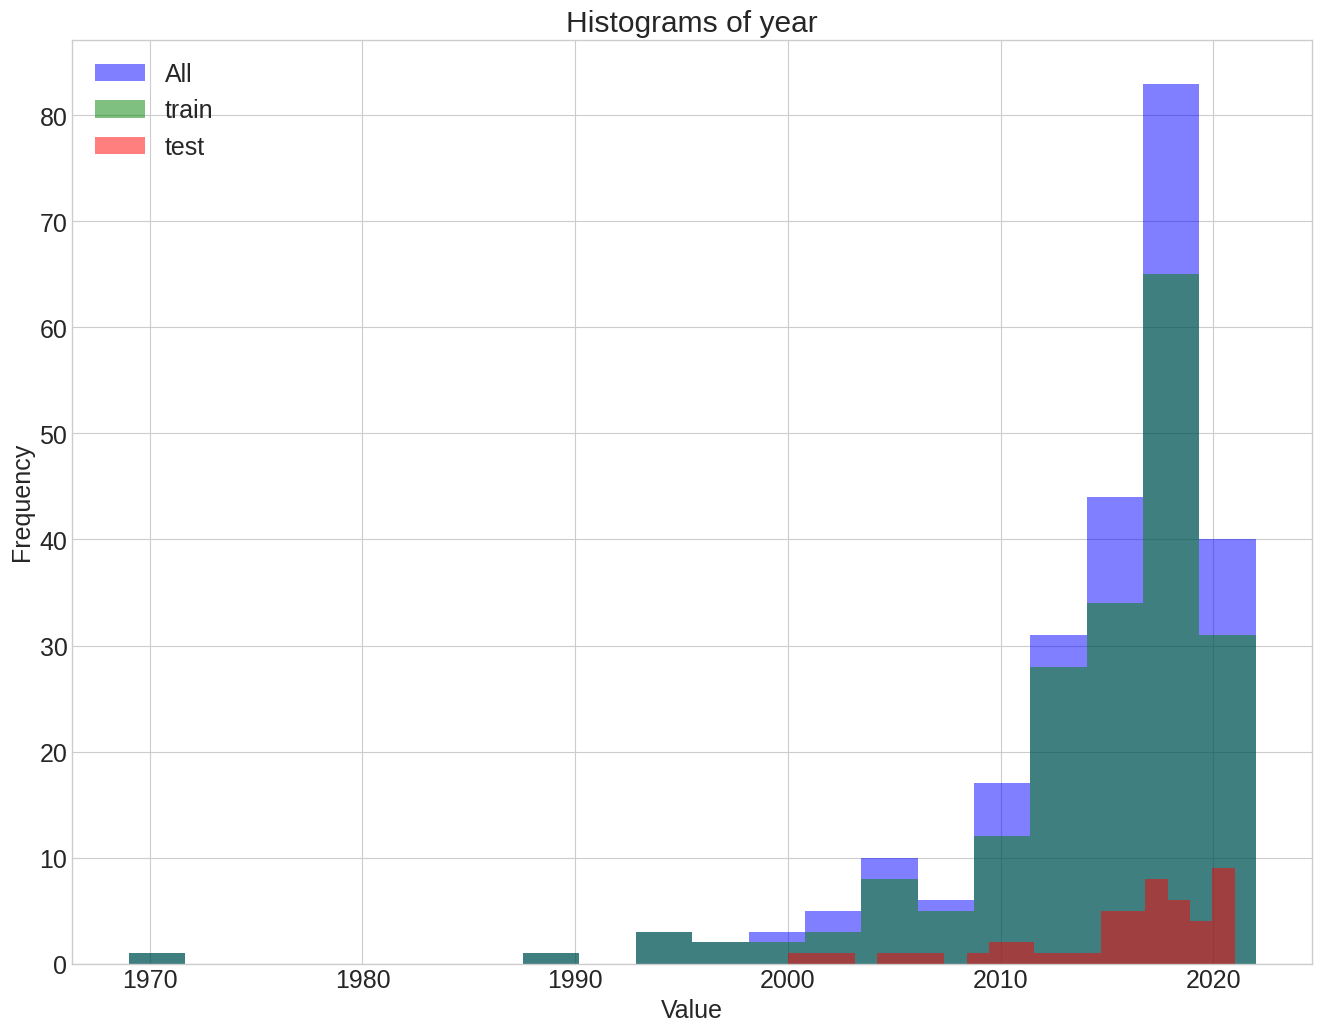

In [11]:
viz.show_split_doc_stats(split1="train", split2="test")